# TASK 3
We have already visualized in the previous tasks the thermal differences in the city of Porto Alegre, and consequently, the heat island effect, between an urbanized area (Meteorological Station of Jardim Botânico) and a rural area (Meteorological Station of Belém Novo). Now we will evaluate the heat island effect between different urbanized areas of the city of Porto Alegre.

The data used will be from the MODIS satellite product MOD11A1, which measures, among other parameters, Land Surface Temperature (LST) in 1km pixels. The City Hall, in the downtown of Porto Alegre and the center of a peripherical neighborhood, called Rubem Berta, were chosen as analysis points. Rubem Berta point was chosen because it has already been verified in the GEE to be a point of great heat accumulation

Goal: To visualize and measure the difference between temperatures within the urban area of the city of Porto Alegre. And as a secondary goal to draw the shape of the heat island of Porto Alegre and its deformation according to the different temperatures.

In [39]:
#pip install imageio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import folium
import imageio
from statistics import mean 

## DATA

1.  DATA ACCESS
The data access was performed by a Python API from Google Earth Engine. It was decided to access the data from the catalog through Google Earth Engine (GEE) because it is more user-friendly.

For more information about the MOD11A1 product, please visit: https://lpdaac.usgs.gov/products/mod11a1v006/

For more information about Earth Engine Python API, please visit: https://developers.google.com/earth-engine/tutorials/community/intro-to-python-api

2. DATA CAPTURE
Unfortunately the API only works inside Google Collab and requires access authentication. Since the submission rules call for a single file, we chose to run the script in Google Collab and import the tables and images to DataCamp Workspace. The import scripts can be viewed at:

SWS - GEE_MODIS_Day (LST daytime data): https://colab.research.google.com/drive/1kUE0jTZALRYfXSEzKLV-wC5dnS7xjwao?usp=sharing

SWS - GEE_MODIS_Night (LST night time data): https://colab.research.google.com/drive/10po44YSWq6ouq23vsTTbCysZCqFxiLQE?usp=share_link

## Importing data

Some abbreviations used
d = daytime
n = night time
center = downtown point
rubem = rubem

In [40]:
#Importing .csv
d_center = pd.read_csv("dataModis/POA_Day_CityCenter.csv", na_values=['null'])
d_rubem = pd.read_csv("dataModis/POA_Day_Rubem.csv", na_values=['null'])
n_center = pd.read_csv("dataModis/POA_Night_CityCenter.csv", na_values=['null'])
n_rubem = pd.read_csv("dataModis/POA_Night_Rubem.csv", na_values=['null'])
d_center.head()

,id,time,datetime,LST_Day_1km
0,1,1609545600000,2021-01-02,30.35
1,2,1609632000000,2021-01-03,30.27
2,3,1609718400000,2021-01-04,31.79
3,6,1609977600000,2021-01-07,26.93
4,7,1610064000000,2021-01-08,31.85


In [41]:
#checkin data
#day_center.head()
d_rubem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           127 non-null    int64  
 1   time         127 non-null    int64  
 2   datetime     127 non-null    object 
 3   LST_Day_1km  127 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 4.1+ KB


The tables do not have information for all days of the year (n=365), this happens because there is a quality factor when importing the satellite image. On cloudy days, it is not possible to get an accurate reading of the LST and this data was discarded when importing from GEE.

In [42]:
#Calculate the average LST found and compare

avg_d_center = mean(d_center.LST_Day_1km) 
avg_d_rubem = mean(d_rubem.LST_Day_1km) 
avg_n_center = mean(n_center.LST_Night_1km) 
avg_n_rubem = mean(n_rubem.LST_Night_1km) 

print('Average daytime LST at downtown Porto Alegre point:', round(avg_d_center, 2), '°C')
print('Average daytime LST at Rubem Berta point:', round(avg_d_rubem, 2), '°C')

print ('              -----')

print('Average night time LST at downtown Porto Alegre point:', round(avg_n_center, 2), '°C')
print('Average night time LST at Rubem Berta point:', round(avg_n_rubem, 2), '°C')

Average daytime LST at downtown Porto Alegre point: 22.21 °C
Average daytime LST at Rubem Berta point: 29.11 °C
              -----
Average night time LST at downtown Porto Alegre point: 17.25 °C
Average night time LST at Rubem Berta point: 15.74 °C


**Thoughts**

In Porto Alegre, the Rubem Berta point has the highest average, with a LST variation of 6.9ºC. The city downtown is not the hottest region during the day, even though the city center presents a more consolidated urban environment which in theory would aggravate the island effect.  
This result can be explained due to the environmental characteristics of the two points. The downtown area is next to a large body of water that helps to regulate the temperature, while the Rubem Berta neighborhood is in an area of unfavorable relief.
At night, the downtown point has the highest average, with a variation of 1.51ºC, possibly due to the effect of the body of water. The water dissipates the heat more slowly which occurs at night.

## Graphs

This section will present graphs with daytime/nighttime LST colleted by day.

<function matplotlib.pyplot.show(close=None, block=None)>

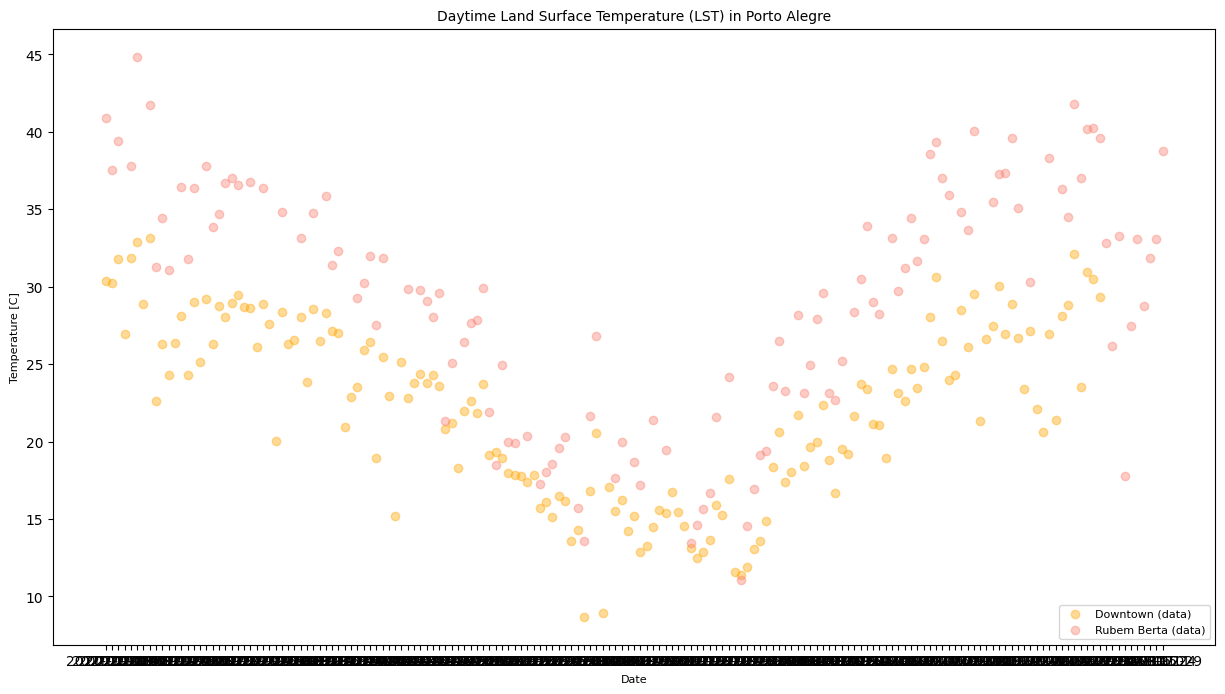

In [43]:
#Simple plot LST
# Add scatter plots.
plt.figure(figsize=(15,8))
plt.scatter(d_center['datetime'], d_center['LST_Day_1km'],
           c='orange', alpha=0.4, label='Downtown (data)')
plt.scatter(d_rubem['datetime'], d_rubem['LST_Day_1km'],
           c='salmon', alpha=0.4, label='Rubem Berta (data)')


# Add some parameters.
plt.title('Daytime Land Surface Temperature (LST) in Porto Alegre', fontsize=10)
plt.xlabel('Date', fontsize=8)
plt.ylabel('Temperature [C]', fontsize=8)
plt.grid(False)
plt.legend(fontsize=8, loc='lower right')

plt.show


In [44]:
#interactive graph

import plotly.graph_objects as go
fig = go.Figure()
# Add traces
fig.add_trace(go.Scatter(x = d_center["datetime"], y= d_center["LST_Day_1km"],
                    mode='markers',
                    marker=dict(color='purple'),
                    name='Rubem Berta'))
fig.add_trace(go.Scatter(x = d_rubem["datetime"], y= d_rubem["LST_Day_1km"],
                    mode='markers',
                    marker=dict(color='green'),
                    name='Downtown'))
fig.update_layout(
    title="Daytime Land Surface Temperature in Porto Alegre",
    yaxis_title="Temperature [C]",
    legend_title="Legend Title",)


fig.show()

**Fitting curve**
It is suggested by GEE to normalize the data, in the following the methodology from GEE's material will be used

It was used the following fuction by Stallman (1965)

![image](Images/image.png)


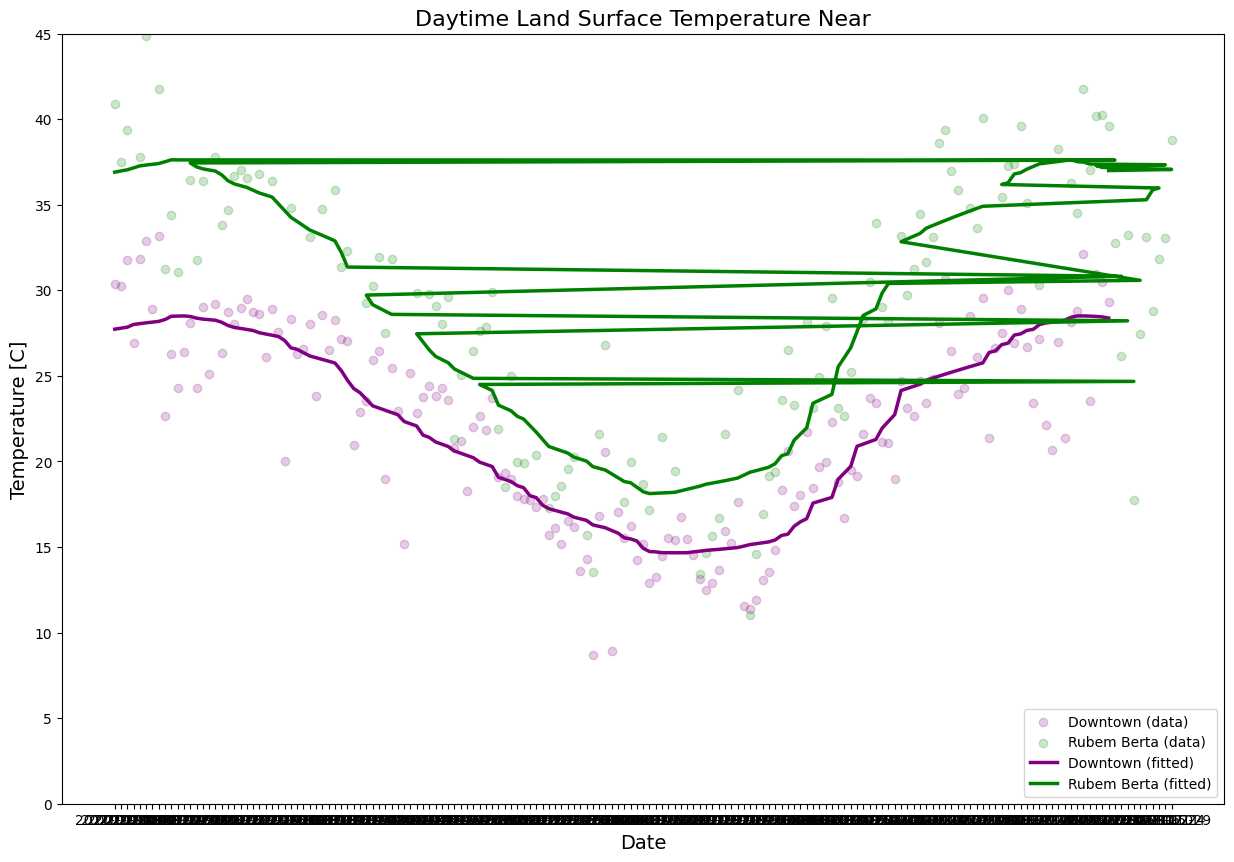

In [45]:
# Fitting curves.
## First, extract x values (times) from the dfs.
d_center_x = np.asanyarray(d_center['time'].apply(float))  # center
d_rubem_x = np.asanyarray(d_rubem['time'].apply(float)) # rubem

## Secondly, extract y values (LST) from the dfs.
d_center_y = np.asanyarray(d_center['LST_Day_1km'].apply(float))  # center
d_rubem_y = np.asanyarray(d_rubem['LST_Day_1km'].apply(float))  # rubem


## Then, define the fitting function with parameters.
def fit_func(t, lst0, delta_lst, tau, phi):
    return lst0 + (delta_lst/2)*np.sin(2*np.pi*t/tau + phi)


## Optimize the parameters using a good start p0.
lst0 = 20
delta_lst = 40
tau = 365*24*3600*1000   # milliseconds in a year
phi = 2*np.pi*4*30.5*3600*1000/tau  # offset regarding when we expect LST(t)=LST0

params_u, params_covariance_u = optimize.curve_fit(
    fit_func, d_center_x, d_center_y, p0=[lst0, delta_lst, tau, phi])
params_r, params_covariance_r = optimize.curve_fit(
    fit_func, d_rubem_x, d_rubem_y, p0=[lst0, delta_lst, tau, phi])

# Add scatter plots.
plt.figure(figsize=(15,10))

plt.scatter(d_center['datetime'], d_center['LST_Day_1km'],
           c='purple', alpha=0.2, label='Downtown (data)')
plt.scatter(d_rubem['datetime'], d_rubem['LST_Day_1km'],
           c='green', alpha=0.2, label='Rubem Berta (data)')

# Add fitting curves.
plt.plot(d_center['datetime'],
        fit_func(d_center_x, params_u[0], params_u[1], params_u[2], params_u[3]),
        label='Downtown (fitted)', color='purple', lw=2.5)
plt.plot(d_rubem['datetime'],
        fit_func(d_rubem_x, params_r[0], params_r[1], params_r[2], params_r[3]),
        label='Rubem Berta (fitted)', color='green', lw=2.5)

# Add some parameters.
plt.title('Daytime Land Surface Temperature Near', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Temperature [C]', fontsize=14)
plt.ylim(-0, 45)
plt.legend(fontsize=10, loc='lower right')

plt.show()

In [46]:
import plotly.graph_objects as go
from scipy import optimize

# Fitting curves.
## First, extract x values (times) from the dfs.
d_center_x = np.asanyarray(d_center['time'].apply(float))  # center
d_rubem_x = np.asanyarray(d_rubem['time'].apply(float)) # rubem

## Secondly, extract y values (LST) from the dfs.
d_center_y = np.asanyarray(d_center['LST_Day_1km'].apply(float))  # center
d_rubem_y = np.asanyarray(d_rubem['LST_Day_1km'].apply(float))  # rubem

## Then, define the fitting function with parameters.
def fit_func(t, lst0, delta_lst, tau, phi):
    return lst0 + (delta_lst/2)*np.sin(2*np.pi*t/tau + phi)

## Optimize the parameters using a good start p0.
lst0 = 20
delta_lst = 40
tau = 365*24*3600*1000   # milliseconds in a year
phi = 2*np.pi*4*30.5*3600*1000/tau  # offset regarding when we expect LST(t)=LST0

params_u, params_covariance_u = optimize.curve_fit(
    fit_func, d_center_x, d_center_y, p0=[lst0, delta_lst, tau, phi])
params_r, params_covariance_r = optimize.curve_fit(
    fit_func, d_rubem_x, d_rubem_y, p0=[lst0, delta_lst, tau, phi])

# Figure
fig = go.Figure()
fig.update_layout(title='Daytime Land Surface Temperature Near',
                  xaxis_title='Date',
                  yaxis_title='Temperature [C]',
                  width=1000, height=500)

fig.add_trace(go.Scatter(x=d_center['datetime'], y=d_center['LST_Day_1km'],
                         mode='markers', name='Downtown (data)',
                         marker=dict(color='purple', opacity=0.2)))

fig.add_trace(go.Scatter(x=d_rubem['datetime'], y=d_rubem['LST_Day_1km'],
                         mode='markers', name='Rubem Berta (data)',
                         marker=dict(color='green', opacity=0.2)))

fig.add_trace(go.Scatter(x=d_center['datetime'],
                         y=fit_func(d_center_x, params_u[0], 
                                    params_u[1], params_u[2], params_u[3]),
                         mode='lines', name='Downtown (fitted)',
                         line=dict(color='purple', width=2.5)))

fig.add_trace(go.Scatter(x=d_rubem['datetime'],
                         y=fit_func(d_rubem_x, params_r[0], 
                                    params_r[1], params_r[2], params_r[3]),
                         mode='lines', name='Rubem Berta (fitted)',
                         line=dict(color='green', width=2.5)))

fig.show()


Unfortunately the normalization did not go well in the matplot but worked at plotly. After normalization the curve, you can see the patterns and the constant difference between the two points.

## Urban health

Selecting days that the temperature starts to affect human health

[Review of World Urban Heat Islands: Many Linked to Increased Mortality](https://asmedigitalcollection.asme.org/energyresources/article-abstract/135/2/022101/365904/Review-of-World-Urban-Heat-Islands-Many-Linked-to?redirectedFrom=PDF) paper shows that above certain temperatures there is a negative effect on health, especially on the circulatory system. Below we show the days when temperatures are higher than recommended, at daytime and night time.



In [47]:
#Set temperatures parameters
max_temp_d = 28.80
max_temp_n = 23.00

#Set variables to analyze the data
max_d_center = d_center[d_center.LST_Day_1km >= max_temp_d]
max_d_rubem = d_rubem[d_rubem.LST_Day_1km >= max_temp_d]
max_n_center = n_center[n_center.LST_Night_1km >= max_temp_n]
max_n_rubem = n_rubem[n_rubem.LST_Night_1km >= max_temp_n]


<function matplotlib.pyplot.show(close=None, block=None)>

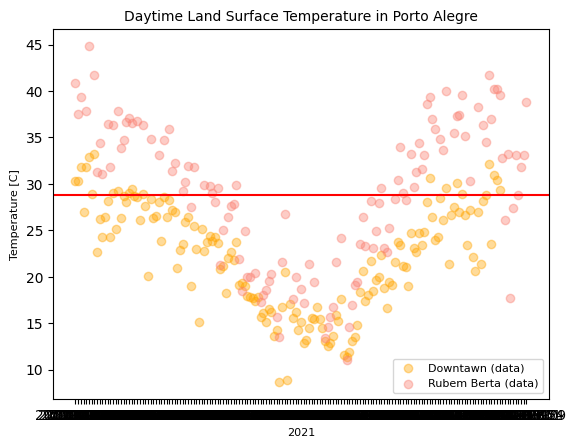

In [48]:
# Add scatter plots with the temperature limit line during daytime
plt.scatter(d_center['datetime'], d_center['LST_Day_1km'],
           c='orange', alpha=0.4, label='Downtawn (data)')
plt.scatter(d_rubem['datetime'], d_rubem['LST_Day_1km'],
           c='salmon', alpha=0.4, label='Rubem Berta (data)')
plt.title('Daytime Land Surface Temperature in Porto Alegre', fontsize=10)
plt.xlabel('2021', fontsize=8)
plt.ylabel('Temperature [C]', fontsize=8)
plt.grid(False)
plt.legend(fontsize=8, loc='lower right')
plt.axhline(max_temp_d, color ='red')
plt.show


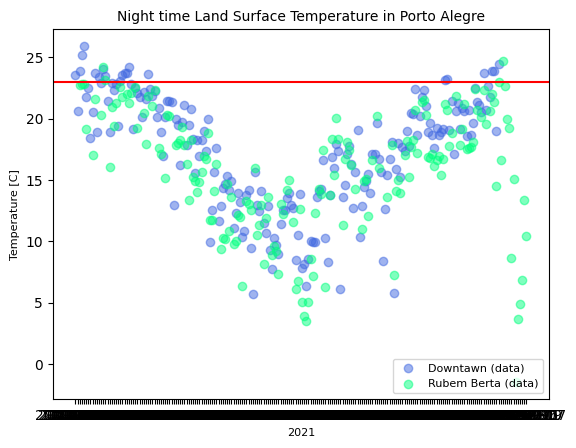

In [49]:
# Add scatter plots with the temperature limit line during nighttime
plt.scatter(n_center['datetime'], n_center['LST_Night_1km'],
           c='royalblue', alpha=0.5, label='Downtawn (data)')
plt.scatter(n_rubem['datetime'], n_rubem['LST_Night_1km'],
           c='springgreen', alpha=0.5, label='Rubem Berta (data)')

plt.title('Night time Land Surface Temperature in Porto Alegre', fontsize=10)
plt.xlabel('2021', fontsize=8)
plt.ylabel('Temperature [C]', fontsize=8)
plt.grid(False)
plt.legend(fontsize=8, loc='lower right')

plt.axhline(max_temp_n, color ='red')

In [50]:
#Sum days in Discomfort 

print ('In 2021, at daytime, Downtown presented', len(max_d_center) ,'days of temperatures (LST) that negatively affect health, while the Rubem Berta neighborhood had', len(max_d_rubem) ,'days above.')

print ('In 2021, at night time, Downtown presented', len(max_n_center) ,'days of temperatures (LST) that negatively affect health, while the Rubem Berta neighborhood had', len(max_n_rubem) ,'days above.')


In 2021, at daytime, Downtown presented 20 days of temperatures (LST) that negatively affect health, while the Rubem Berta neighborhood had 72 days above.
In 2021, at night time, Downtown presented 20 days of temperatures (LST) that negatively affect health, while the Rubem Berta neighborhood had 3 days above.


## MAP

This section will show LST maps. Two maps will be displayed, first with the sum of the annual data and the other of the week of the day with the greatest variation between the two points.
Again the information was imported from the GEE API.



In [51]:
#Selecting the higher temperature between Downtown and Rubem Berta to export the map
#Margin tables to compare values
#_x = downtown point and _y = rubem berta point

merged_df = pd.merge(d_center, d_rubem, how='inner', left_on=['datetime'], right_on = ['datetime'])
merged_df['variation'] = abs(merged_df['LST_Day_1km_y'] - merged_df['LST_Day_1km_x']) 
merged_df.head()

,id_x,time_x,datetime,LST_Day_1km_x,id_y,time_y,LST_Day_1km_y,variation
0,1,1609545600000,2021-01-02,30.35,1,1609545600000,40.91,10.56
1,2,1609632000000,2021-01-03,30.27,2,1609632000000,37.51,7.24
2,3,1609718400000,2021-01-04,31.79,3,1609718400000,39.39,7.60
3,7,1610064000000,2021-01-08,31.85,7,1610064000000,37.81,5.96
4,8,1610150400000,2021-01-09,32.87,8,1610150400000,44.85,11.98


In [52]:
merged_df.iloc[merged_df['variation'].idxmax()]
#the day with the highest variation was 2021-12-23

id_x                       356
time_x           1640217600000
datetime            2021-12-23
LST_Day_1km_x            23.53
id_y                       356
time_y           1640217600000
LST_Day_1km_y            37.03
variation                 13.5
Name: 113, dtype: object

### Folium

It was not possible to operate the GEOtiff images in this script, so it was chosen to export the map of the Collab platform in a jpg image and overlay it in a Folium Map. 

In [53]:
#Load the images and plot them inside the folium

#Folium only operate in the jupterlab
def generate_map(image_path):
    lat, lon = -30.0280, -51.2286
    
    my_map = folium.Map(location=[lat, lon], zoom_start=12)

    folium.Marker(
        [-30.0280, -51.2286], popup="<i>Porto Alegre downtowm location</i>"
    ).add_to(my_map)
    folium.Marker(
        [-30.0048, -51.0984], popup="<i>Rubem Berta location</i>"
    ).add_to(my_map)

    image_data = imageio.imread(image_path)
    test_img = folium.raster_layers.ImageOverlay(
        image=image_data, opacity=0.6,mercator_project=True,
        bounds=[[-30.207908029153334, -51.434833983513755], [-29.848022680970367, -51.02179665555035]]
    )

    my_map.add_child(test_img)
    return my_map

**Map: Week with most variation of temperature**

C:\Users\USER\AppData\Local\Temp\ipykernel_4512\1886815216.py:16: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.




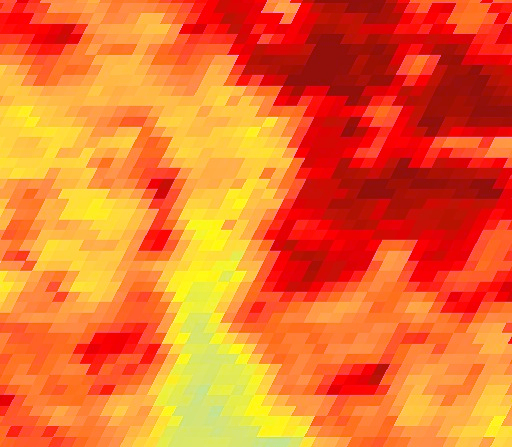

In [54]:
#Folium only operate in the jupterlab

generate_map('Images/week_with_most_variation_temperatur.jpeg')

**Map:  Average annual LST (Temperature)**

C:\Users\USER\AppData\Local\Temp\ipykernel_4512\1886815216.py:16: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.




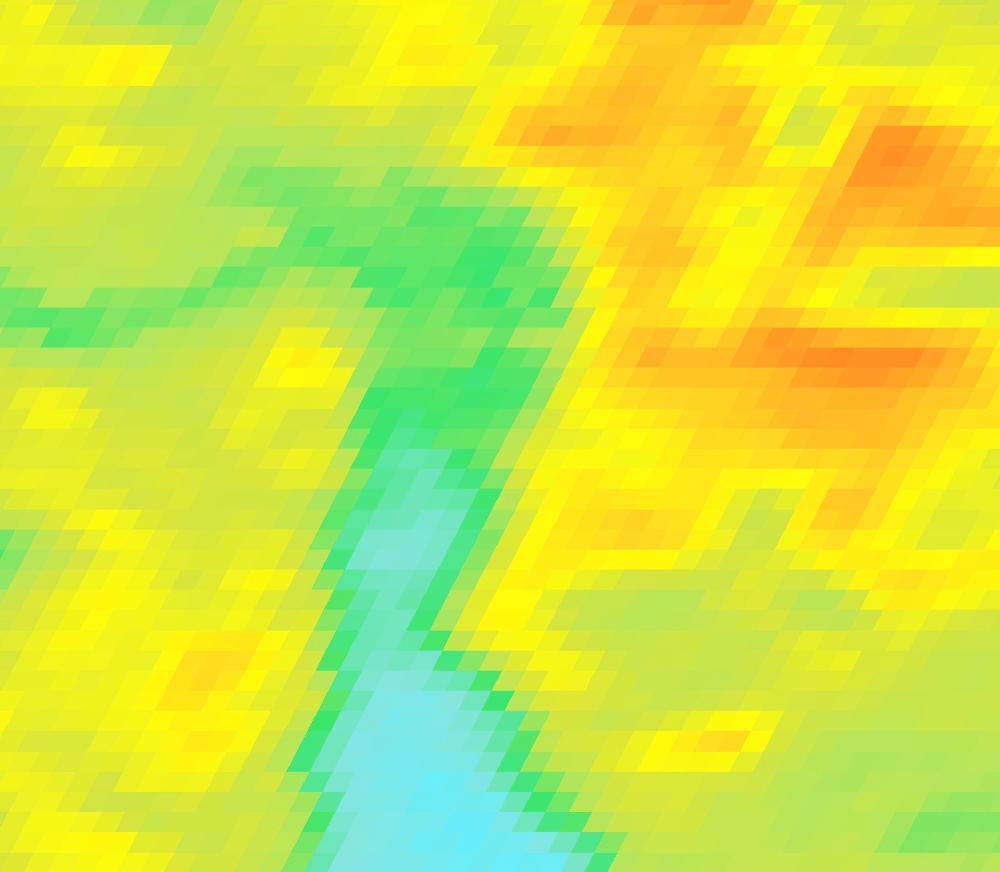

In [55]:
#Folium only operate in the jupterlab

generate_map('Images/yearly_temperature_variation.jpeg')

# Closing thoughts

With the maps, it is possible to see many other characteristics of Porto Alegre city. There is a region to the east with the highest temperatures in the city and the positive effect that the body of water has to regulate temperatures nearby.

It is also possible to see the heat islands of nearby cities and how they join with the temperature rise. And that vegetated areas in the center, protected by environmental laws, have milder temperatures.
 
##  Future applications

In future work, it could relate the size and shape of the heat island in the east to the temperature at the weather station, analyzing its deformation and expansion as the temperature increases. Also, it could analyze more points and compare the LST situation in different neighborhoods of the city, for example.
And it could be studied what impact the heat island has on the health of the population living in the eastern part of the city, for example if there is a higher occurrence of heart disease.

In a further step, it could add layers of relief and anthropic condition and see the correlation between these factors.